# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [101]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [102]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [103]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [104]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [105]:
df=pd.merge(cell_phones, population, how='inner', on=('geo', 'time'))
print(df.shape)
df.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [106]:
df=pd.merge(df, geo_country_codes[['geo','country']], how='inner', on='geo')
print(df.shape)
df.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [107]:
#I tried being clever and creating a lambda function here but it did not work
#df['phones_per_person'] = map(lambda x, y, z: x/y=z, df['cell_phones_total'], df['population_total'], df['phones_per_person'])
df['phones_per_person'] = df['cell_phones_total']/ df['population_total']
print(df.shape)
df.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,phones_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [108]:
def to_upper_case(df_data, column):
    """This function will make the column of a df into upper case."""
    
    df_data[column] = df_data[column].str.upper()
    
    return df_data

In [109]:
df = to_upper_case(df, 'geo')

In [110]:
print(df.shape)
df.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [111]:
df.describe()

,time,cell_phones_total,population_total,phones_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [112]:
df.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,CMR,Ireland
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [113]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format
df.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [114]:
df_2017 = df[df.time == 2017]
df_2017.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
45,AFG,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557
91,AGO,2017,"13,323,952.0",29784193,Angola,0.4473497737541521
137,ALB,2017,"3,497,950.0",2930187,Albania,1.19376340144844
183,AND,2017,"80,337.0",76965,Andorra,1.0438121223932957
219,ARE,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495


In [115]:
df_2017.sort_values(by=['cell_phones_total'], ascending=False).head(5)

,geo,time,cell_phones_total,population_total,country,phones_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [119]:
condition = (df['cell_phones_total'] >= df['population_total'])

usa_subset = df.loc[condition]

usa_subset = usa_subset[usa_subset.country=='United States']
usa_subset.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df1 = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df1['Occupation'] = df1['Group'].apply(get_occupation)

In [149]:
df1.head().isnull().sum()

Year                         0
GoogleKnowlege_Occupation    0
Show                         0
Group                        0
Guest                        0
Occupation                   0
dtype: int64

In [150]:
df1.head(20)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,"Acting, Comedy & Music"
7,1999,model,1/21/99,Media,Carmen Electra,Media
8,1999,actor,1/25/99,Acting,Matthew Lillard,"Acting, Comedy & Music"
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [180]:
df1 = df1.set_index('Year')

In [181]:
df1.head()

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,
1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [187]:
df1['Occupation'].value_counts(normalize=True)

Acting, Comedy & Music     0.4467137021908652
Media                     0.28072781284812476
Government and Politics   0.14259190493873003
Other                     0.12996658002227998
Name: Occupation, dtype: float64

In [192]:
df_cross = pd.pivot_table(df1, values = 'Group', index = 'Year',columns ='Occupation', aggfunc=np.sum)
df_cross

,Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,,
1999,Group,ActingComedyActingActingActingActingMusicianAc...,PoliticianPolitician,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,0.0
2000,Group,ActingMusicianMusicianActingActingActingActing...,PoliticianPoliticianPoliticianPoliticianPoliti...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN
2001,Group,MusicianActingActingActingActingActingActingAc...,GovernmentPolitical AideGovernmentPoliticianPo...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN
2002,Group,ActingActingActingActingActingActingActingActi...,PoliticianGovernmentPolitical AidePoliticianPo...,MediaMediaMediaMediaMediaMediamediaMediaMediaM...,NaN
2003,Group,ActingComedyActingActingActingActingActingActi...,PoliticianGovernmentPoliticianPoliticianPoliti...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN
2004,Group,ComedyActingComedyActingActingActingActingActi...,PoliticianPoliticianPoliticianPoliticianPoliti...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN
2005,Group,ActingActingActingActingActingActingMusicianAc...,PoliticianPoliticianPoliticianGovernmentPoliti...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,MiscAcademicAcademicMilitaryBusinessConsultant...
2006,Group,ActingActingActingMusicianActingComedyActingAc...,GovernmentPoliticianPoliticianPoliticianPoliti...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN
2007,Group,ActingActingActingComedyComedyActingActingCome...,PoliticianPoliticianPolitical AidePoliticianPo...,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...,NaN


In [182]:
#df1.reset_index()
cross = df1.pivot_table(index='Year', columns='occupation')
#id_vars='Year', value_vars=['Occupation'], value_name='occupation')
cross

KeyError: 'occupation'

In [183]:
table = cross.pivot_table(index='Year', columns='occupation', values = try_out )

KeyError: 0.4467137021908652

In [179]:
df1['Occupation'].counts(normalize=True)


AttributeError: 'Series' object has no attribute 'counts'

### Part 2 — Recreate this explanatory visualization:

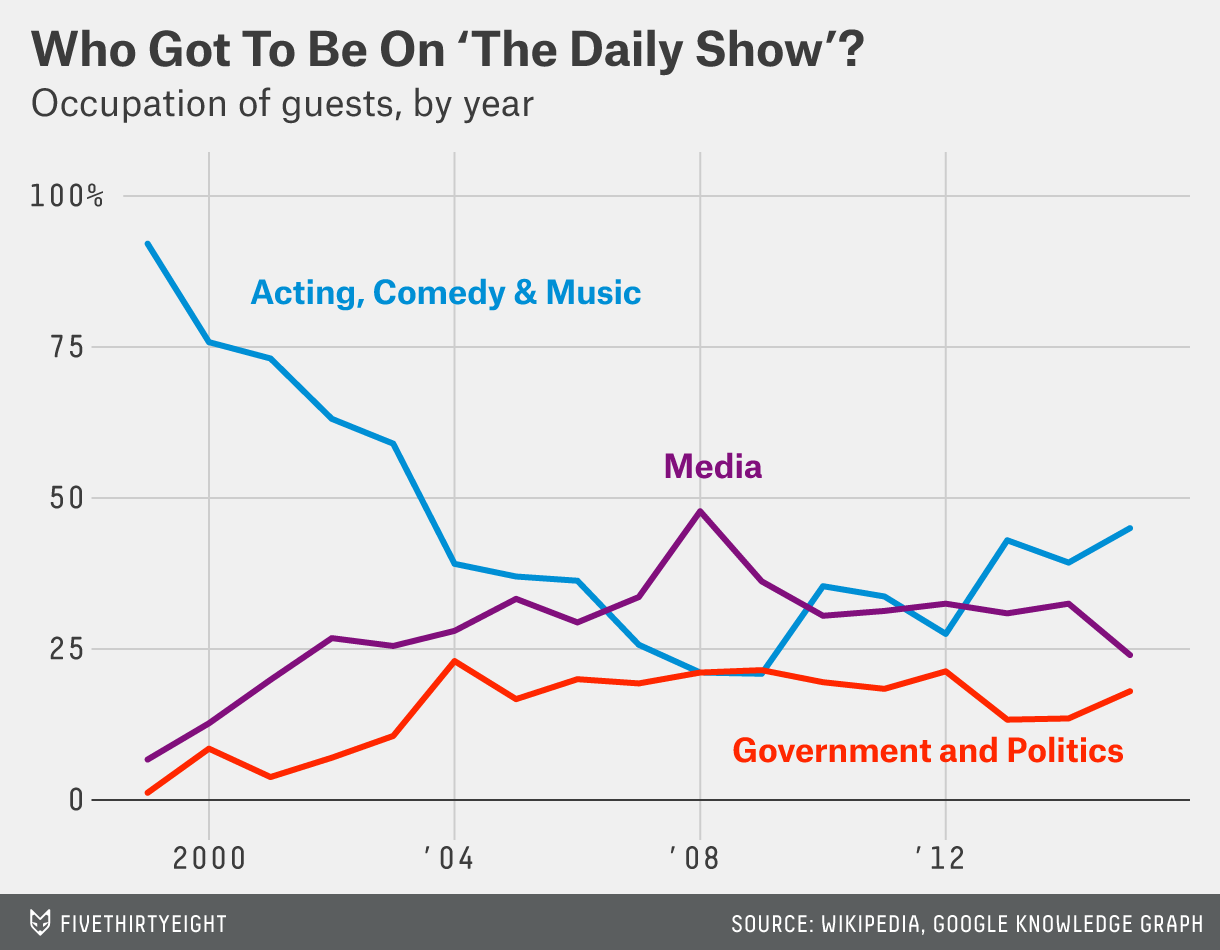

In [122]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.